# 1  Numeric code preparation
use $ {}^1\!H $ bound with $ K^- $ to preper and check your code

## 1.2

### In this section:

calculate the ground state of $ {}^1\!H K^-$
use Numerov method to calculate $ u\left(r;E\right) $ for the energies $ E = (-1.1R_y, -1.05R_y, -1R_y, -0.95R_y, -0.9R_y) $ 

use $N=10^4,\; R=10a_B $

plot $ u\left(r\mid E\right) $

do not forget to normalize the function 
$$ |u|^2 = \int_{r}{u(r)^{2}dr} $$
$$ \tilde{u} = \frac{u}{|u|} $$

### code

#### calculation

In [2]:
from utils import to_latex
from preset import H1K as sys, get_non_rel_W
import numpy as np
from sys import float_info
from numerov_model import Numerov
from IPython.display import display, Math

w = get_non_rel_W(sys, l=0)
m = Numerov(sys, w)
N = int(1e4)
r = np.linspace(float_info.epsilon , 10, N)
E = np.array([-1.1, -1.05, -1, -0.95, -0.9])

display(Math(r"\begin{array}{cl|lcl|lc}" +
             rf'\mu = {to_latex(sys.mu, ".5g")} &&& ' +
             f'R_y = {to_latex(sys.R_y, ".3e")} &&& ' + 
             rf'a_B = {to_latex(sys.a_B, ".2g")} \\ \hline ' + 
             r'V(r) = -\frac{\alpha Z \hbar c}{r} &&& ' +
             f'N = {N:,} &&& ' +
             f'R = 10 a_B = {to_latex(10*sys.a_B,".5g")}' +
             r"\end{array}"))
u = m.u(r, E)


<IPython.core.display.Math object>

  0%|          | 0/9998 [00:00<?, ?it/s]

#### visualization

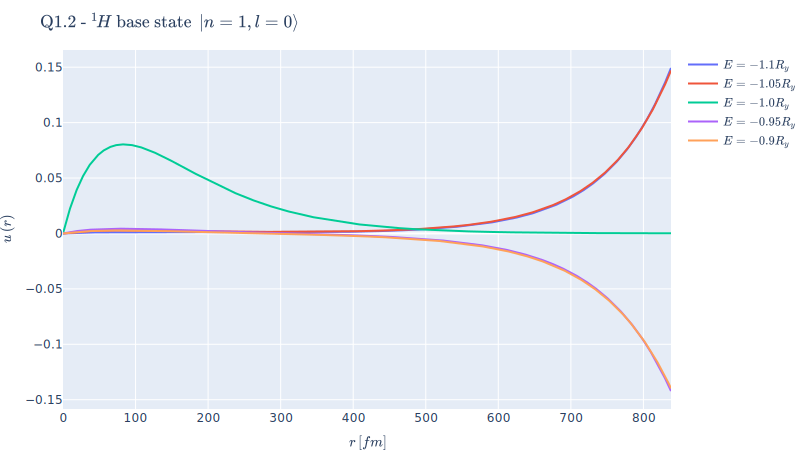

In [3]:
# @title Q1.1 - $u(r)$ for $E=-1.1R_y, -1.05R_y, -1R_y, -0.95R_y, -0.9R_y$
from plotly import graph_objects as go
from utils import plotly_export

fig = go.Figure()
for i in range(len(E)):
    fig.add_trace(go.Scatter(x=r*m.a_B, y=u[:,i], mode='lines', name=f'$ E={E[i]}R_y $'))
fig.update_layout(title=r'$ \text{Q1.2 - } {}^{1}\!H \text{ base state } \left|n=1,l=0\right> $')
fig.update_xaxes(title=r'$ r \left[fm\right] $') \
    .update_yaxes(title=r'$ u\left(r\right) $')
plotly_export(fig, '1.2')

### results

we see that $u\left(R\mid -R_y\right)\cong0$ and for the other energies, it blows to hight and low values. 

from this we can understad that $E=-R_y$ is a bound energy and that the bound energies will be between energy that blows up and one that blows down.

## 1.3

just check of the root function

In [3]:
# from utils import const
from preset import H1K as sys, get_non_rel_W
import numpy as np
from sys import float_info
from numerov_model import Numerov
# from IPython.display import display, Math, display_latex, ProgressBar

w = get_non_rel_W(sys, l=0)
m = Numerov(sys, w)
N = int(1e4)
r = np.linspace(float_info.epsilon , 10, N)
E = m.find_root(-0.9, -1.1, r)[0]
u = m.u(r, E)

diff=2e-16, u_min=5e-12 1 / fm(1/2), u_max=-1e-11 1 / fm(1/2)


  0%|          | 0/9998 [00:00<?, ?it/s]

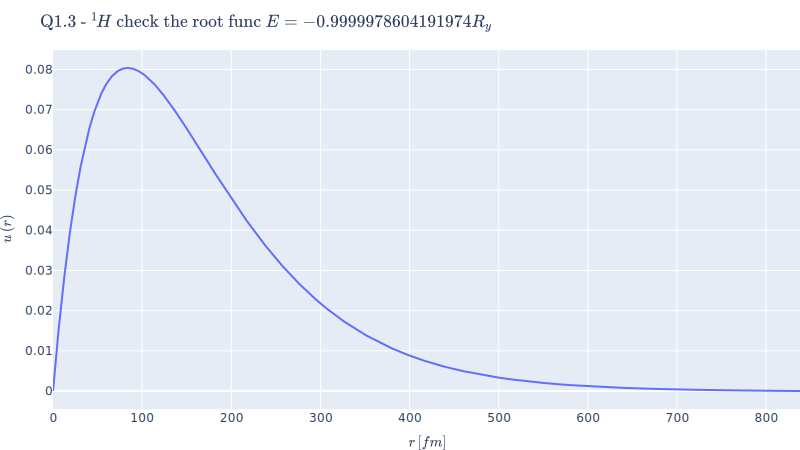

In [ ]:
from plotly import graph_objects as go
from utils import plotly_export

fig = go.Figure([go.Scatter(x=r*m.a_B, y=u, mode='lines', name=f'$ E={E}R_y $')])
fig.update_layout(title=r'$ \text{Q1.3 - } {}^{1}\!H \text{ check the root func } $')
fig.update_xaxes(title=r'$ r \left[fm\right] $') \
    .update_yaxes(title=r'$ u\left(r\right) $')
plotly_export(fig, '1.3', clear=True)

## 1.4

### In this section:

use the _root finding_ method (Numerov.find_root) to find the ground state energy E of the system

use $ R=20a_B $ and do it for $ N = (10^2, 10^3, 10^4, 10^5) $

calcculate the _relative error_  $ \eta = \left| 1-\frac{E(N,R)}{-\frac{R_y}{n^2}} \right| = \left| 1+\frac{R_y \cdot E(N,R)}{n^2} \right| $ and plot $ \eta(N) $

### code

#### calculations

In [ ]:
from utils import error
from preset import H1K as sys, get_non_rel_W
import numpy as np
from sys import float_info
from numerov_model import Numerov
from IPython.display import display, Math

w = get_non_rel_W(sys, l=0)
m = Numerov(sys, w)
Ns = np.array([int(1e2), int(1e3), int(1e4), int(1e5)])
etta = np.zeros((*Ns.shape, 1), dtype=float)
for i, N in enumerate(Ns):
    r = np.linspace(float_info.epsilon, 20, N)
    E = m.find_root(-1.05, -0.95, r, 100)
    print(E)
    etta[i] = error(E,n=1)
etta = etta.squeeze()

diff=1e-15, u_min=-2e-10 1 / fm(1/2), u_max=2e-10 1 / fm(1/2)
[-0.97839802]
diff=1e-15, u_min=-3e-09 1 / fm(1/2), u_max=2e-09 1 / fm(1/2)
[-0.99973827]
diff=1e-15, u_min=-3e-09 1 / fm(1/2), u_max=4e-08 1 / fm(1/2)
[-0.99999734]
diff=1e-15, u_min=-1e-07 1 / fm(1/2), u_max=3e-07 1 / fm(1/2)
[-0.99999997]


#### visualisation

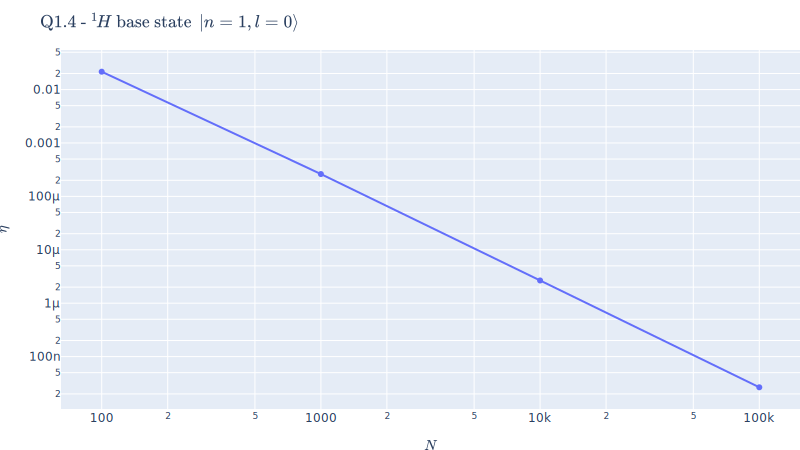

<IPython.core.display.Math object>

In [7]:
from plotly import graph_objects as go
from utils import plotly_export

fig = go.Figure() \
    .add_trace(go.Scatter(x=Ns, y=etta, mode='lines+markers')) \
    .update_layout(title=r'$ \text{Q1.4 - } {}^{1}\!H \text{ base state } \left|n=1,l=0\right> $',
                   margin=dict(t=50, b=0, l=0, r=120), width=800, height=450) \
    .update_xaxes(type='log', title=r'$ N $') \
    .update_yaxes(type='log', title=r'$ \eta $')
fig.write_image(r"./plots/1.4.svg", width=800, height=450,format='svg',engine='kaleido')
plotly_export(fig, '1.4')
power_law = np.log(etta[-1]/etta[0])/np.log(Ns[-1]/Ns[0])
display(Math(rf'\eta \propto N^{{{power_law:.8f}}}'))

### results

we can see that the error $\eta$ is power-law of the number of points $N$. 

when we extruct the power from the slope we get $$ \eta \propto N^{-1.97...} $$

## 1.5

### In this section:

calculate the energy levels of the system for the quantum states $ n=(1,2,3),\, l=(0,1,2) $

here use $ N=10^4 $ but chose $ R $ wisely for each state $ \left(n, l\right) $

ensure relative error $ \eta \sim 10^-6 $   
[here I used $ \eta < 3\cdot10^-6 $]

generate a table of the energy $ E$, the relative error $\eta$, and the radios $ r = \sqrt{\braket{r^2}}  $


$$ \braket{r^2} = \int_{0}^{R}{u^2(r)r^2dr} $$


### 1.5.1 find the arias of the bound energies and the effect of R on the result 

Here I tried to see how does $ u\left(E,R\right) $ is behave as function of E.

#### code

##### calculations

In [6]:
# from utils import const, plotly_show_config, to_latex
from preset import H1K as sys, get_non_rel_W
import numpy as np
from sys import float_info
from numerov_model import Numerov
# from IPython.display import display, Math
# from scipy.stats import norm

N = 20_000
n = 3
R = [20, 40, 60]
u_table = {}
for l in range(n):
    w = get_non_rel_W(sys, l)
    m = Numerov(sys, w)
    e = np.linspace(0, -1.1, 200)
    for r_val in R:
        u_table[(l, r_val)] = m.u(np.linspace(float_info.epsilon, r_val, N), e)[-1,:]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

  0%|          | 0/19998 [00:00<?, ?it/s]

##### visualisation

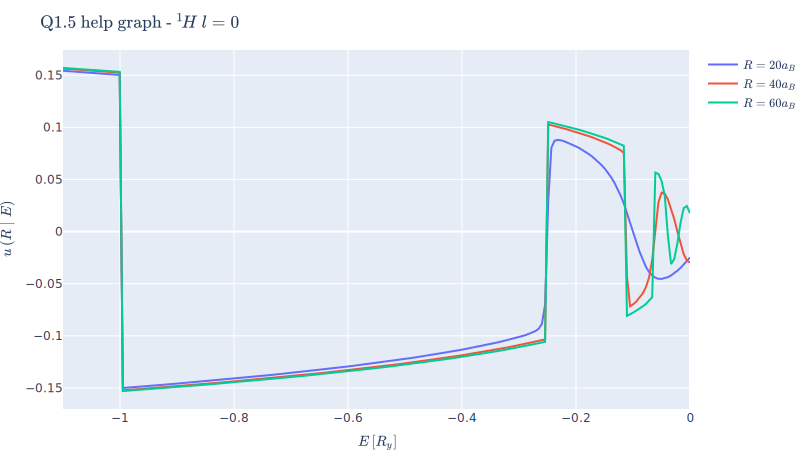

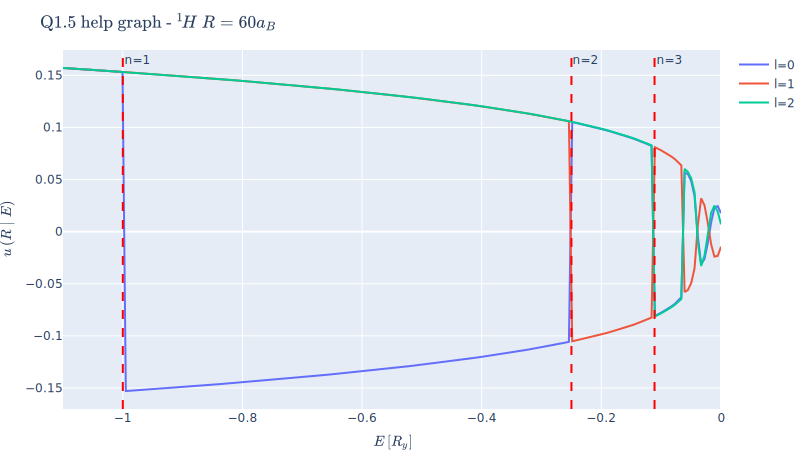

In [8]:
from plotly import graph_objects as go
from utils import plotly_export

# Graph for l=0 and different Rs
fig_l0 = go.Figure(data=[
    go.Scatter(x=e, y=u_table[(0, r_val)], mode='lines', name=f"$R={r_val}a_B$")
    for r_val in R
])
fig_l0.update_layout(title=r'$ \text{Q1.5 help graph - } {}^{1}\!H \text{  } l=0 $') \
       .update_xaxes(title=r'$ E \left[R_y\right] $') \
       .update_yaxes(title=r'$ u\left(R\mid E\right) $')
# for n_val in range(1, 4):
#     fig_l0.add_vline(x=-1/n_val**2, line=dict(color="red", dash="dash"), annotation_text=f"n={n_val}", annotation_position="top right")
plotly_export(fig_l0, '1.5_R')

# Graph for different ls and the last R
fig_ls = go.Figure(data=[
    go.Scatter(x=e, y=u_table[(l_val, R[-1])], mode='lines', name=f"l={l_val}")
    for l_val in range(n)
])
fig_ls.update_layout(title=r'$ \text{Q1.5 help graph - } {}^{1}\!H \text{  } R='+str(R[-1])+'a_B $') \
       .update_xaxes(title=r'$ E \left[R_y\right] $') \
       .update_yaxes(title=r'$ u\left(R\mid E\right) $')
for n_val in range(1, 4):
    fig_ls.add_vline(x=-1/n_val**2, line=dict(color="red", dash="dash"), annotation_text=f"n={n_val}", annotation_position="top right")
plotly_export(fig_ls, '1.5_l')

#### results

as we can see, as we rise the value of R we get more presice value foe the bound energy, but if R is too large, it become imposible for the computer to get the exact value.

we also can see that (at least for $l=0$) we are getting the results we expected, as $E=-R_y/n^2$ and we see kind of phase shift in $E=-1R_y, -0.5R_y, -0.11R_y$ 

### 1.5.2 do the job

as we learnd from 1.5.1, we know where to search for the bound energies.

also, we know that for higher energy, we need to take lower R, as the computer will not be able to get to the exact stable point.

here I took $ R(n=1) = 20a_B $, $ R(n=2) = 40a_B $, $ R(n=3) = 60a_B $, 

In [11]:
from utils import relative_error
from preset import H1K as sys, get_non_rel_W
import numpy as np
from sys import float_info
from numerov_model import Numerov # Make absolutely sure this file is correct - the code depends on it
from IPython.display import display
import pandas as pd

N = 20_000


df = pd.DataFrame({
    'n': [1, 2, 3],
    'R': [20, 40, 60],
    'energy_low': [-1.05, -0.3, -0.12],
    'energy_high': [-0.95, -0.2, -0.1]
})
table = pd.DataFrame('', index=pd.Index([f'{n=}' for n in df['n']]), columns=pd.Index([f'{l=}' for l in range(3)]), dtype=object)
# display(df)
display_table = table.copy()

h = display(display_table, display_id=True)
pd.options.display.max_colwidth=10000
pd.options.display.colheader_justify = 'center'


for _, row in df.iterrows():
    n = int(row['n'])
    for l_str in table.columns:
        l = int(l_str.split('=')[1])
        if l < n:
            w = get_non_rel_W(sys, l=0)
            m = Numerov(sys, w)
            r = np.linspace(float_info.epsilon, row['R'], N)
            E = m.find_root(row['energy_low'], row['energy_high'], r)[0]
            u = m.u(r, E)
            error = relative_error(E,n)
            r_mean = np.sqrt(np.trapezoid((r**2)*(u**2), r, axis=0))
            table.at[f'{n=}', l_str] = {"E": E, "u": u, "r_mean": r_mean, "relative_error": error}
            display_table.at[f'{n=}', l_str] = rf'$$ E = {E:.3f}R_y = {E*m.R_y:.3e}$$ $$ \eta = {error:.2e} $$ $$ \langle r \rangle = {r_mean:.3f}a_B = {r_mean*m.a_B:.3f} $$'
            h.update(display_table)

display(display_table, clear=True)



,l=0,l=1,l=2
n=1,$$ E = -1.000R_y = -8.592e-03 MeV$$ $$ \eta = 6.66e-07 $$ $$ \langle r \rangle = 0.189 1 / fm(1/2)a_B = 15.856 fm(1/2) $$,,
n=2,$$ E = -0.250R_y = -2.148e-03 MeV$$ $$ \eta = 1.33e-06 $$ $$ \langle r \rangle = 0.708 1 / fm(1/2)a_B = 59.327 fm(1/2) $$,$$ E = -0.250R_y = -2.148e-03 MeV$$ $$ \eta = 1.33e-06 $$ $$ \langle r \rangle = 0.708 1 / fm(1/2)a_B = 59.327 fm(1/2) $$,
n=3,$$ E = -0.111R_y = -9.546e-04 MeV$$ $$ \eta = 1.99e-06 $$ $$ \langle r \rangle = 1.572 1 / fm(1/2)a_B = 131.708 fm(1/2) $$,$$ E = -0.111R_y = -9.546e-04 MeV$$ $$ \eta = 1.99e-06 $$ $$ \langle r \rangle = 1.572 1 / fm(1/2)a_B = 131.708 fm(1/2) $$,$$ E = -0.111R_y = -9.546e-04 MeV$$ $$ \eta = 1.99e-06 $$ $$ \langle r \rangle = 1.572 1 / fm(1/2)a_B = 131.708 fm(1/2) $$


## 1.6

### In this section:

as in the limit $ r \gg a_B $ **W** good astimaion is 
$$ W(r \gg a_B) = \frac{2\mu}{\hbar}E $$
the equation for u become more simple:
$$ u''(r \gg a_B) + \frac{2\mu}{\hbar}E r \gg a_B = 0 $$
and given that E in negative:
$$ u(r \gg a_B) = u_0 e^{-kr}$$
where $k = \sqrt{-\frac{2\mu}{\hbar}E} $